<a href="https://colab.research.google.com/github/Bangkit-Capstone-C241-BB01/BlurOrBokeh_ML_All/blob/main/Plain_Deep_Learning_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import sys
import PIL
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Layer, Input, Conv2D, MaxPool2D, Flatten, Concatenate, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential

PIL.Image.MAX_IMAGE_PIXELS = None

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
base_dir = "/content/drive/My Drive/Blur or Bokeh"

data_dir = os.path.join(base_dir, "DatasetV4")

train_dir = os.path.join(data_dir, "train")
validation_dir = os.path.join(data_dir, "val")
test_dir = os.path.join(data_dir, "test")

# print('total training images:', len(os.listdir(train_dir)))
# print('total validation images:', len(os.listdir(validation_dir)))
# print('total test images:', len(os.listdir(test_dir)))

In [ ]:
image_size = (300, 300)
class_names = ["Blur", "Bokeh", "Normal"]

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
)

Found 1771 images belonging to 3 classes.
Found 328 images belonging to 3 classes.
Found 114 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPool2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.1),
    BatchNormalization(),

    Dense(3, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 149, 149, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 73, 73, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 35, 35, 128)     

In [ ]:
epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=epochs
)

Epoch 1/10
55/55 [==============================] - 69s 1s/step - loss: 0.9922 - accuracy: 0.5561 - val_loss: 3.9473 - val_accuracy: 0.3000
Epoch 2/10
55/55 [==============================] - 64s 1s/step - loss: 0.8127 - accuracy: 0.6463 - val_loss: 3.1778 - val_accuracy: 0.3000
Epoch 3/10
55/55 [==============================] - 68s 1s/step - loss: 0.7391 - accuracy: 0.6826 - val_loss: 1.0670 - val_accuracy: 0.5156
Epoch 4/10
55/55 [==============================] - 68s 1s/step - loss: 0.7027 - accuracy: 0.7004 - val_loss: 0.7102 - val_accuracy: 0.6781
Epoch 5/10
55/55 [==============================] - 65s 1s/step - loss: 0.6575 - accuracy: 0.7240 - val_loss: 1.0791 - val_accuracy: 0.5719
Epoch 6/10
55/55 [==============================] - 68s 1s/step - loss: 0.6360 - accuracy: 0.7257 - val_loss: 0.5474 - val_accuracy: 0.7531
Epoch 7/10
55/55 [==============================] - 69s 1s/step - loss: 0.5768 - accuracy: 0.7631 - val_loss: 0.5904 - val_accuracy: 0.7219
Epoch 8/10
55/55 [==

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_acc:.4f}")

3/3 [==============================] - 3s 848ms/step - loss: 0.6921 - accuracy: 0.7708
Test Accuracy: 0.7708


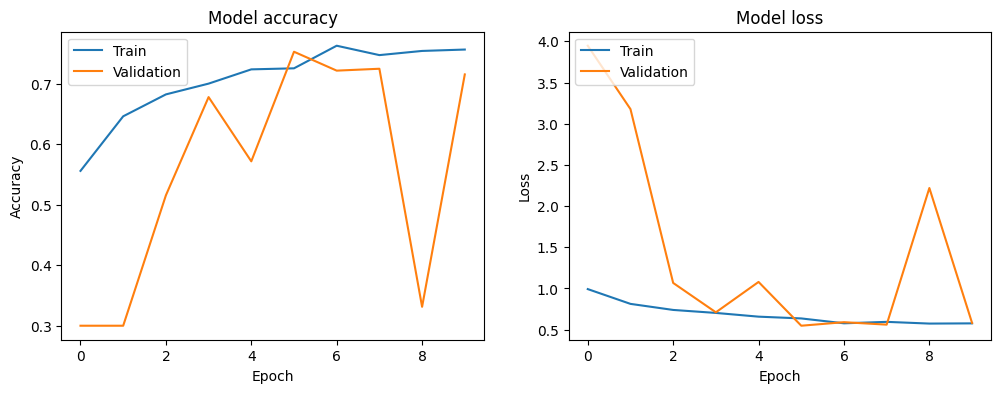

In [ ]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()